# Hydrogenic single solution Schrodinger equation

In [1]:
using Pkg;
Pkg.activate("../../SchrodingerEquationSolver");
include("../src/SchrodingerEquationSolver.jl");
import .SchrodingerEquationSolver as ses
import .ses.Grids as Grids
import .ses.Potentials as Potentials
import .ses.MathUtils as MathUtils
import .ses.Hydrogen as Hydrogen
import .ses.InitialConditions as InitialConditions
import .ses.OneDSchrodingerEquationSolver as odses
import .ses.EigenvalueFinders as EigenvalueFinders
using Plots

  Activating project at `~/Desktop/physics_coding_projects/julia/SchrodingerEquationSolver`


In [2]:
#Define parameters and produce an exponential grid.
r_max::Float64=50.0;
Z::Int64=18; #Atomic number, also used as the charge of coulomb potential.
grid_stru= Grids.init_exponential_grid_structure(r_max, Z);
grid= grid_stru.grid;
grid_i= grid_stru.grid_i;
a=grid_stru.a;
b=grid_stru.b;
c_i= (a*b).*(exp.(b.*grid_i));
grid_sqrt= grid.^2.0; 
N= size(grid)[1]; #Number of points in the grid.
print("grid size ", N)

grid size 8312

In [3]:
#Definition of the potentials with angular quantum number 0 
l::Int64=0;
v_colu= Potentials.coulomb_potential(Z, grid);
v_angu= Potentials.angular_potential(l, grid);
v_effe= v_colu + v_angu;

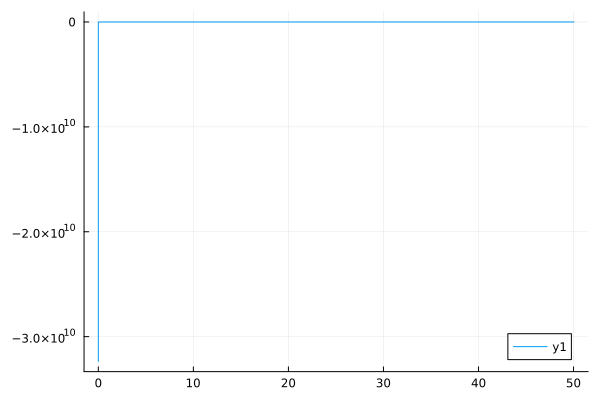

In [4]:
plot(grid, v_colu)

In [5]:
n::Float64=1.0; #shell level
ei= -0.5*(Z^2 / n^2); #Energy of hydrogenic atom
#Definition of initial conditions
v1, dv1, v_end, dv_end, end_i =InitialConditions.atom_v(grid_stru, ei, l);

8312
8311
8310
8309
8308
8307
8306
8305
8304
8303
8302
8301
8300
8299
8298
8297
8296
8295
8294
8293
8292
8291
8290
8289
8288
8287
8286
8285
8284
8283
8282
8281
8280
8279
8278
8277
8276
8275
8274
8273
8272
8271
8270
8269
8268
8267
8266
8265
8264
8263
8262
8261
8260
8259
8258
8257
8256
8255
8254
8253
8252
8251
8250
8249
8248
8247
8246
8245
8244
8243
8242
8241
8240
8239
8238
8237
8236
8235
8234
8233
8232
8231
8230
8229
8228
8227
8226
8225
8224
8223
8222
8221
8220
8219
8218
8217
8216
8215
8214
8213
8212
8211
8210
8209
8208
8207
8206
8205
8204
8203
8202
8201
8200
8199
8198
8197
8196
8195
8194
8193
8192
8191
8190
8189
8188
8187
8186
8185
8184
8183
8182
8181
8180
8179
8178
8177
8176
8175
8174
8173
8172
8171
8170
8169
8168
8167
8166
8165
8164
8163
8162
8161
8160
8159
8158
8157
8156
8155
8154
8153
8152
8151
8150
8149
8148
8147
8146
8145
8144
8143
8142
8141
8140
8139
8138
8137
8136
8135
8134
8133
8132
8131
8130
8129
8128
8127
8126
8125
8124
8123
8122
8121
8120
8119
8118
8117
8116
8115
8114
8113


# Solution of Schrodinger’s equation of the form 

$\frac{1}{2} \frac{d^2 u}{dr^2} + v_{effe} u = e_i u$

The solver integrates the equation from r_{min} to r_{max} (forward integration) and vice versa (backwards integration). The function returns the integrated function $u$ and the value of the merge of both forward and backwards solutions.

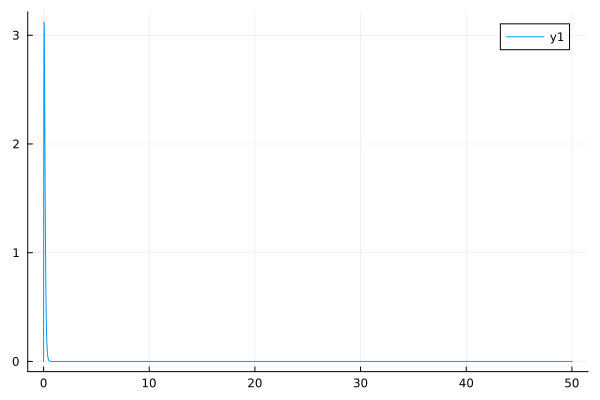

In [6]:


u_merged, merge_value= odses.solver_v_return_u(ei, v1, dv1, v_end, dv_end, end_i, v_effe, grid_stru);;
plot(grid, u_merged)
#plot(size=(900,400))

In [11]:
u_merged

8233-element Vector{Float64}:
 7.754400455097882e-8
 1.5526687561995914e-7
 2.331690249835792e-7
 3.112508662219418e-7
 3.8951281383027984e-7
 4.6795528325387277e-7
 5.465786908981059e-7
 6.253834541138252e-7
 7.043699912202844e-7
 7.835387214995891e-7
 ⋮
 2.19143029547e-313
 4.3696398096e-314
 8.683331175e-315
 1.719129384e-315
 3.38245167e-316
 6.022769e-317
 1.504186e-317
 0.0
 0.0